In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

620

In [3]:
#Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set up lists to hold reponse info
City_name, Lat, Lng, Max_Tmp, Humidity, Cloudiness, Wind_Spd, Country, Date = [], [],[],[],[],[],[],[],[]
i,b=0,1

#Loop through each character
for city in cities:
    i=i+1
#Create search query, make request and store in json
    response = requests.get(query_url + city).json()
    
#Try to append data of interest to correesponding list
    try:
        City_name.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Tmp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Spd.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        
#Create test to print
        print(f"Processing Record {i} of set {b} | {city}")
        
#Handle exceptions for city not found
    except:
        print("City not found. Skipping...")
        pass
    if i >= 50:
        i=0
        b=b+1
        


Processing Record 1 of set 1 | isla vista
Processing Record 2 of set 1 | hithadhoo
City not found. Skipping...
Processing Record 4 of set 1 | tefe
Processing Record 5 of set 1 | tasiilaq
Processing Record 6 of set 1 | kutum
Processing Record 7 of set 1 | dwarka
Processing Record 8 of set 1 | jamestown
Processing Record 9 of set 1 | mancora
Processing Record 10 of set 1 | bosaso
Processing Record 11 of set 1 | lasa
Processing Record 12 of set 1 | punta arenas
Processing Record 13 of set 1 | cape town
Processing Record 14 of set 1 | pisco
Processing Record 15 of set 1 | arraial do cabo
Processing Record 16 of set 1 | ushuaia
Processing Record 17 of set 1 | qaqortoq
Processing Record 18 of set 1 | atuona
Processing Record 19 of set 1 | kon tum
Processing Record 20 of set 1 | tuatapere
City not found. Skipping...
Processing Record 22 of set 1 | hermanus
Processing Record 23 of set 1 | lebu
Processing Record 24 of set 1 | yichang
Processing Record 25 of set 1 | bluff
Processing Record 26 of

Processing Record 7 of set 5 | cabo san lucas
Processing Record 8 of set 5 | srednekolymsk
Processing Record 9 of set 5 | celestun
Processing Record 10 of set 5 | maamba
Processing Record 11 of set 5 | mecca
Processing Record 12 of set 5 | bubaque
Processing Record 13 of set 5 | birao
Processing Record 14 of set 5 | omsukchan
Processing Record 15 of set 5 | komsomolskiy
Processing Record 16 of set 5 | burns lake
Processing Record 17 of set 5 | mogadishu
Processing Record 18 of set 5 | zhangjiakou
Processing Record 19 of set 5 | mumbwa
Processing Record 20 of set 5 | staryy nadym
Processing Record 21 of set 5 | pangody
Processing Record 22 of set 5 | humberto de campos
Processing Record 23 of set 5 | tokmak
Processing Record 24 of set 5 | lagos
Processing Record 25 of set 5 | geraldton
Processing Record 26 of set 5 | kharp
Processing Record 27 of set 5 | muros
Processing Record 28 of set 5 | raduzhnyy
Processing Record 29 of set 5 | ribeira grande
Processing Record 30 of set 5 | kamenka

Processing Record 14 of set 9 | barranca
Processing Record 15 of set 9 | dongning
Processing Record 16 of set 9 | abaete
Processing Record 17 of set 9 | superior
Processing Record 18 of set 9 | codrington
Processing Record 19 of set 9 | luanda
Processing Record 20 of set 9 | arman
Processing Record 21 of set 9 | mizdah
Processing Record 22 of set 9 | melfort
Processing Record 23 of set 9 | ust-kulom
Processing Record 24 of set 9 | adeje
Processing Record 25 of set 9 | gimli
Processing Record 26 of set 9 | san quintin
Processing Record 27 of set 9 | terpinnya
Processing Record 28 of set 9 | santa maria
Processing Record 29 of set 9 | ligayan
Processing Record 30 of set 9 | sayan
Processing Record 31 of set 9 | whitehorse
Processing Record 32 of set 9 | botwood
Processing Record 33 of set 9 | moju
Processing Record 34 of set 9 | itiuba
Processing Record 35 of set 9 | magway
Processing Record 36 of set 9 | samarai
Processing Record 37 of set 9 | wanlaweyn
Processing Record 38 of set 9 | e

Processing Record 15 of set 13 | oda
Processing Record 16 of set 13 | fort nelson
Processing Record 17 of set 13 | buritizeiro
Processing Record 18 of set 13 | opelousas
Processing Record 19 of set 13 | karwar
Processing Record 20 of set 13 | saint-pierre


In [4]:
#Create dictionary with lists 
Weather_dict={
    "City":City_name,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp":Max_Tmp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Spd,
    "Country":Country,
    "Date":Date
}

#Create Data Frame and display
weather_df=pd.DataFrame(Weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isla Vista,34.4133,-119.8610,55.00,81,1,5.68,US,1610099503
1,Hithadhoo,-0.6000,73.0833,83.57,78,95,18.48,MV,1610099532
2,Tefé,-3.3542,-64.7114,70.66,98,99,2.28,BR,1610099532
3,Tasiilaq,65.6145,-37.6368,12.20,73,0,28.77,GL,1610099533
4,Kutum,14.2000,24.6667,77.16,17,0,22.59,SD,1610099533
...,...,...,...,...,...,...,...,...,...
561,Fort Nelson,58.8053,-122.7002,1.40,85,40,2.30,CA,1610099582
562,Buritizeiro,-17.3511,-44.9622,71.71,88,80,3.04,BR,1610099440
563,Opelousas,30.5335,-92.0815,44.01,75,75,6.91,US,1610099582
564,Karwar,14.8000,74.1333,83.61,67,56,7.09,IN,1610099582


In [5]:
#display descriptive statistics
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.536837,13.549172,50.021784,72.747350,56.787986,8.309152,1.610100e+09
std,32.585799,88.979751,32.321461,21.542749,39.956050,5.809425,5.835002e+01
min,-54.800000,-179.166700,-43.440000,10.000000,0.000000,0.220000,1.610099e+09
25%,-4.801975,-65.033675,30.200000,65.000000,9.000000,3.702500,1.610100e+09
50%,24.490450,20.617750,60.835000,78.000000,75.000000,6.910000,1.610100e+09
75%,47.495975,86.012875,77.000000,88.000000,92.000000,11.500000,1.610100e+09
max,78.218600,173.783300,98.650000,100.000000,100.000000,32.210000,1.610100e+09


In [6]:
#export data frame to csv file
weather_df.to_csv(output_data_file, index=False)

In [7]:
#filter cities with humidity bigger than 100
filt=(weather_df['Humidity']>100)
weather_df[filt]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#filter cities with humidity of 100
#---I filtered Humidity==100 just for practice
filt=(weather_df['Humidity']==100)
weather_df[filt]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
38,Tacoronte,28.4769,-16.4102,62.01,100,75,26.46,ES,1610099536
89,Emerald,-23.5333,148.1667,71.60,100,90,19.57,AU,1610099540
96,Norrtälje,59.7580,18.7050,36.00,100,90,8.05,SE,1610099540
122,Saint-François,46.4154,3.9054,35.01,100,90,2.30,FR,1610099543
123,Cumbitara,1.6517,-77.5823,57.31,100,100,1.99,CO,1610099543
125,Kigoma,-4.8769,29.6267,68.00,100,90,3.96,TZ,1610099543
141,Torbay,47.6666,-52.7314,41.00,100,90,6.91,CA,1610099544
165,Airai,-8.9266,125.4092,64.51,100,98,2.10,TL,1610099546
220,Ladson,32.9857,-80.1098,46.40,100,90,9.22,US,1610099552
251,Cayenne,4.9333,-52.3333,73.40,100,75,2.30,GF,1610099554


In [9]:
#  Get the indices of cities that have humidity over 100%.
#---I filtered Humidity==100 just for practice
equal_100=weather_df.index[filt]
equal_100=equal_100.tolist()
equal_100

[38,
 89,
 96,
 122,
 123,
 125,
 141,
 165,
 220,
 251,
 357,
 424,
 464,
 468,
 487,
 532,
 558]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#---I filtered Humidity==100 just for practice
Cleaned_weather_df=weather_df.drop(equal_100)

In [11]:
# I checked that all indexes with Humidity==100 were dropped
filt=(Cleaned_weather_df['Humidity']==100)
Cleaned_weather_df[filt]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
# Create a new column to display date with a different format
#---I filtered Humidity==100 just for practice
Cleaned_weather_df['Date_only']=pd.to_datetime(Cleaned_weather_df['Date'],unit='s')
Cleaned_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date_only
0,Isla Vista,34.4133,-119.8610,55.00,81,1,5.68,US,1610099503,2021-01-08 09:51:43
1,Hithadhoo,-0.6000,73.0833,83.57,78,95,18.48,MV,1610099532,2021-01-08 09:52:12
2,Tefé,-3.3542,-64.7114,70.66,98,99,2.28,BR,1610099532,2021-01-08 09:52:12
3,Tasiilaq,65.6145,-37.6368,12.20,73,0,28.77,GL,1610099533,2021-01-08 09:52:13
4,Kutum,14.2000,24.6667,77.16,17,0,22.59,SD,1610099533,2021-01-08 09:52:13
...,...,...,...,...,...,...,...,...,...,...
561,Fort Nelson,58.8053,-122.7002,1.40,85,40,2.30,CA,1610099582,2021-01-08 09:53:02
562,Buritizeiro,-17.3511,-44.9622,71.71,88,80,3.04,BR,1610099440,2021-01-08 09:50:40
563,Opelousas,30.5335,-92.0815,44.01,75,75,6.91,US,1610099582,2021-01-08 09:53:02
564,Karwar,14.8000,74.1333,83.61,67,56,7.09,IN,1610099582,2021-01-08 09:53:02


In [14]:
#Get the date
Date=Cleaned_weather_df['Date_only'].values[0]
Date=str(Date)
Date=Date[0:10]
print(Date)

2021-01-08


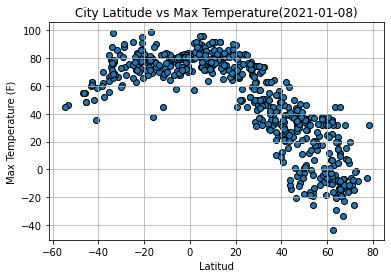

In [15]:
#Scatter Plot Latitud vs Max Temp
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitud')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature('+Date+')')
plt.grid()
plt.show()

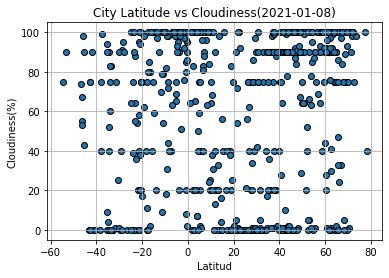

In [16]:
#Scatter Plot Latitud vs Cloudiness
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitud')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs Cloudiness('+Date+')')
plt.grid()
plt.show()

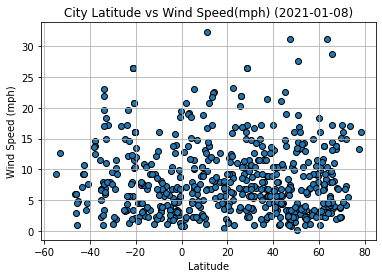

In [17]:
#Scatter Plot Latitud vs wind Speed
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed(mph) ('+Date+')')
plt.grid()
plt.show()

In [18]:
#Get all cities of the northern hemisphere
filt=(weather_df['Lat']>0)
North_Hemisphere_df=weather_df[filt]
North_Hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isla Vista,34.4133,-119.8610,55.00,81,1,5.68,US,1610099503
3,Tasiilaq,65.6145,-37.6368,12.20,73,0,28.77,GL,1610099533
4,Kutum,14.2000,24.6667,77.16,17,0,22.59,SD,1610099533
5,Dwārka,22.2394,68.9678,75.74,31,0,15.88,IN,1610099533
6,Jamestown,42.0970,-79.2353,24.01,93,90,4.61,US,1610098917
...,...,...,...,...,...,...,...,...,...
558,Santa Cruz de Tenerife,28.4682,-16.2546,62.01,100,75,26.46,ES,1610099529
560,Ōdachō-ōda,35.1833,132.5000,28.40,59,75,13.80,JP,1610099581
561,Fort Nelson,58.8053,-122.7002,1.40,85,40,2.30,CA,1610099582
563,Opelousas,30.5335,-92.0815,44.01,75,75,6.91,US,1610099582


The r-squared is: 0.7594302642867987


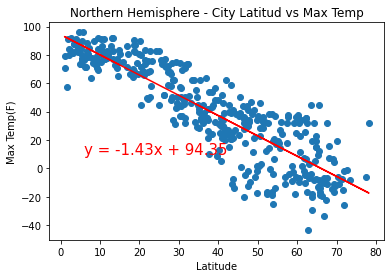

In [19]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = North_Hemisphere_df['Lat']
y_values = North_Hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.title('Northern Hemisphere - City Latitud vs Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [20]:
#Get all cities of the southern hemisphere
filt=(weather_df['Lat']<0)
South_Hemisphere_df=weather_df[filt]
South_Hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hithadhoo,-0.6000,73.0833,83.57,78,95,18.48,MV,1610099532
2,Tefé,-3.3542,-64.7114,70.66,98,99,2.28,BR,1610099532
7,Máncora,-4.1078,-81.0475,73.29,72,90,6.80,PE,1610099533
10,Punta Arenas,-53.1500,-70.9167,46.40,87,90,12.66,CL,1610099533
11,Cape Town,-33.9258,18.4232,77.00,50,0,23.02,ZA,1610099533
...,...,...,...,...,...,...,...,...,...
552,Ritchie,-29.0380,24.6028,80.60,61,40,6.91,ZA,1610099581
553,Kirakira,-10.4544,161.9205,76.80,88,100,12.95,SB,1610099581
559,Gold Coast,-28.0000,153.4333,68.00,88,90,9.22,AU,1610099571
562,Buritizeiro,-17.3511,-44.9622,71.71,88,80,3.04,BR,1610099440


The r-squared is: 0.2229555901479699


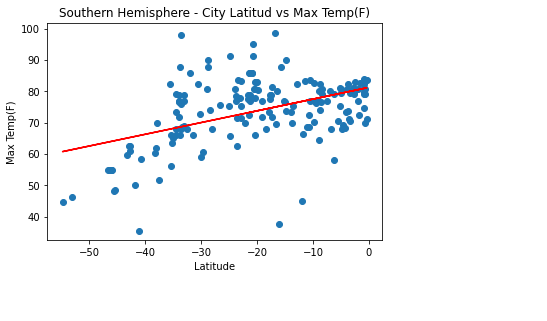

In [21]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = South_Hemisphere_df['Lat']
y_values = South_Hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.title('Southern Hemisphere - City Latitud vs Max Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1837918731995479


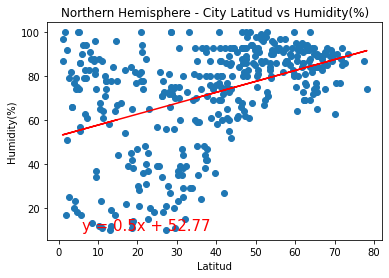

In [22]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = North_Hemisphere_df['Lat']
y_values = North_Hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity(%)')
plt.title('Northern Hemisphere - City Latitud vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.09296382785639606


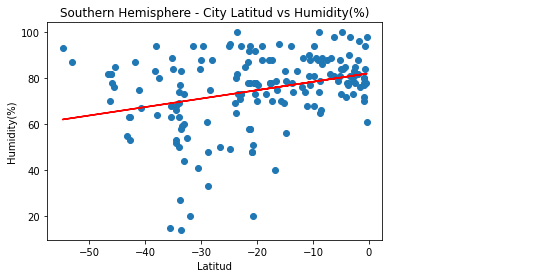

In [23]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = South_Hemisphere_df['Lat']
y_values = South_Hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity(%)')
plt.title('Southern Hemisphere - City Latitud vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07095393762131208


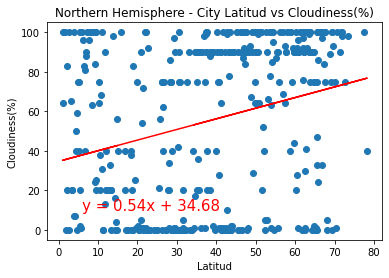

In [24]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = North_Hemisphere_df['Lat']
y_values = North_Hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Cloudiness(%)')
plt.title('Northern Hemisphere - City Latitud vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1329726084846479


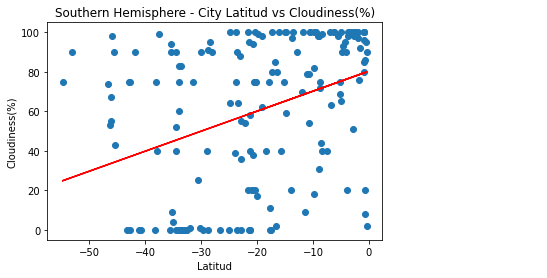

In [25]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = South_Hemisphere_df['Lat']
y_values = South_Hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Cloudiness(%)')
plt.title('Southern Hemisphere - City Latitud vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.008243548565294577


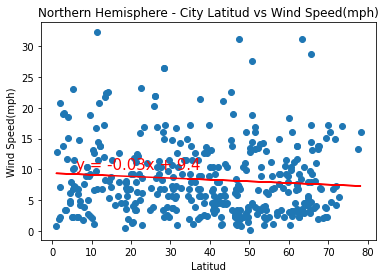

In [26]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = North_Hemisphere_df['Lat']
y_values = North_Hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Wind Speed(mph)')
plt.title('Northern Hemisphere - City Latitud vs Wind Speed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.024657793260096834


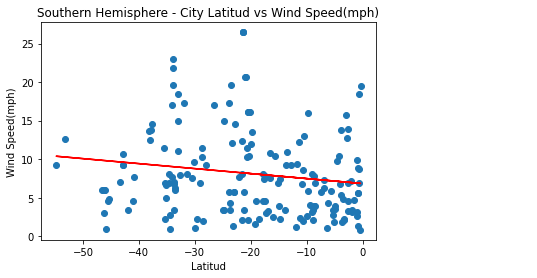

In [27]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = South_Hemisphere_df['Lat']
y_values = South_Hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Wind Speed(mph)')
plt.title('Southern Hemisphere - City Latitud vs Wind Speed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()